<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

In [26]:
from tabulate import tabulate

In [27]:
pip install mysql-connector-python

In [28]:
import mysql.connector as sql

In [55]:
# import life expectancy table from MySQL
db_connection = sql.connect(host='208.109.18.154', database='ids9db', user='ids9', password='Jzf4519')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

lifeDF = pd.DataFrame(table_rows)

print(tabulate(lifeDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤══════╤══════╤═════╤═══════╤══════════════╤══════╤═══════╤══════════════╤════════════╤══════╕
│     │ 0                        │    1 │    2 │   3 │     4 │            5 │    6 │     7 │            8 │          9 │   10 │
╞═════╪══════════════════════════╪══════╪══════╪═════╪═══════╪══════════════╪══════╪═══════╪══════════════╪════════════╪══════╡
│   0 │ Afghanistan              │ 2010 │ 58.8 │ 279 │  0.01 │    79.6794   │ 16.7 │  9.2  │    553.329   │    2883167 │  9.2 │
├─────┼──────────────────────────┼──────┼──────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   1 │ Afghanistan              │ 2011 │ 59.2 │ 275 │  0.01 │     7.09711  │ 17.2 │  7.87 │     63.5372  │    2978599 │  9.5 │
├─────┼──────────────────────────┼──────┼──────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   2 │ Afghanistan              │ 2012 │ 59.5 │ 272 │  0.01 │    78.1842   │ 17.6 │  8.52 │    669.959 

In [30]:
# Name dataframe columns

lifeDF.columns = ['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling']

print(tabulate(lifeDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════╤═════════════╕
│     │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │   Population │   Schooling │
╞═════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════╪═════════════╡
│   0 │ Afghanistan              │   2010 │              58.8 │               279 │      0.01 │                79.6794   │  16.7 │                9.2  │    553.329   │      2883167 │         9.2 │
├─────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────┼─────────────┤
│   1 │ Afghani

In [31]:
# calculate Pearson's correlation

from scipy.stats import pearsonr

data1 = lifeDF['Adult_Mortality']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)



Pearsons correlation: -0.75115


In [32]:
# eating habits
data1 = lifeDF['BMI']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.54895


In [33]:
# drinking alcohol
data1 = lifeDF['Alcohol']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.47889


In [34]:
# economic factor
data1 = lifeDF['Percentage_Expenditure']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.42714


In [35]:
# economic factor
data1 = lifeDF['GDP']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.47157


In [36]:
# economic factor
data1 = lifeDF['Total_Expenditure']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.25731


In [37]:
#social factor
data1 = lifeDF['Population']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.03440


In [38]:
# schooling

data1 = lifeDF['Schooling']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)



Pearsons correlation: 0.80173


Create and plot several linear regression models for life expectancy (as the dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

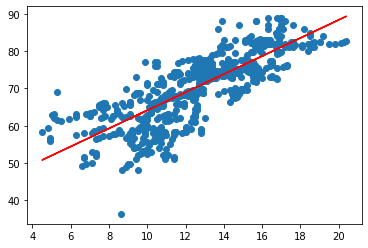

In [56]:
#Linear regression of schooling and life expectancy 
LRdata = lifeDF

X = lifeDF.iloc[:, 10].values.reshape(-1,1)
Y = lifeDF.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [57]:
# equation + R2 and MSE values
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[2.42898147]]
The intercept:  [39.83277387]
MSE:  28.856785599858085
R2:  0.6427713989793805


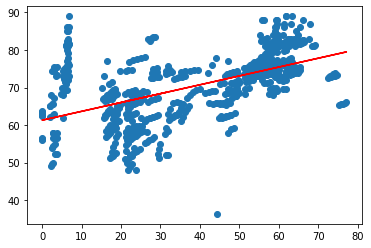

In [58]:
#linear regression of BMI and life expectancy
X = lifeDF.iloc[:, 6].values.reshape(-1,1)
Y = lifeDF.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [59]:
# equation + R2 and MSE values
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[0.23624569]]
The intercept:  [61.28011729]
MSE:  56.43723007013499
R2:  0.3013430870993369


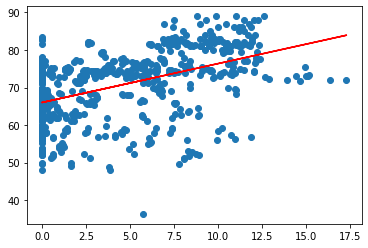

In [60]:
#linear regression of alcohol and life expectancy
X = lifeDF.iloc[:, 4].values.reshape(-1,1)
Y = lifeDF.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [61]:
# equation + R2 and MSE values
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[1.03586431]]
The intercept:  [66.00678629]
MSE:  62.254108210682865
R2:  0.22933384569354565
